# Machine Learning and Statistics Project 2020
Author Angela Carpenter
- [power production dataset](https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv) from Ian McLoughlin Github

# Table of Contents
- Project Instructions / Overview
- Project plan
- About this Notebook
- Python Libraries
- Downloading and running the code
- Loading / Reading in the dataset
- Exploring the dataset
- Describing the dataset
- Summary Statistics
- Visualising the dataset using plots
- Summary and Conclusions
- References


## Project Instructions

In this project you must create a web service that uses machine learning to make pre- dictions based on the data set powerproduction available on Moodle. The goal is to produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set. You must then develop a web service that will respond with predicted power values based on speed values sent as HTTP requests. Your submission must be in the form of a git repository containing, at a minimum, the following items.
1. Jupyter notebook that trains a model using the data set. In the notebook you should explain your model and give an analysis of its accuracy.
2. Python script that runs a web service based on the model, as above.
3. Dockerfile to build and run the web service in a container.
4. Standard items in a git repository such as a README.
To enhance your submission, you might consider developing and comparing more than one model. Rest assured, all the above concepts will be explored in lecture videos and other materials in the coming semester.

## Project Plan

- Explore the dataset first using descriptive statistics and some plots
- Start by looking at the statistics from my previous project 

In [1]:
# first importing the following libraries
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# save link to data and reference the link 
csv_url = 'https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv'

In [3]:
df = pd.read_csv(csv_url)
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [4]:
print("The first few rows in the dataset: \n\n", df.head(3))  # look at the top 5 rows of the DataFrame df
print('\n The final few rows in the dataset \n',df.tail(3)) # Look at the bottom 5 rows of the DataFrame

The first few rows in the dataset: 

    speed  power
0  0.000    0.0
1  0.125    0.0
2  0.150    0.0

 The final few rows in the dataset 
       speed  power
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0


In [5]:
print("The index of the DataFrame: ", df.index) # the index or row labels of the DataFrame

The index of the DataFrame:  RangeIndex(start=0, stop=500, step=1)


In [6]:
print("The dtypes in the dataframe are:", end='\n\n')

print(df.dtypes) # the data types attributes for each column in df

The dtypes in the dataframe are:

speed    float64
power    float64
dtype: object


In [7]:
print(df.isnull().sum())
df.notnull().sum()

speed    0
power    0
dtype: int64


speed    500
power    500
dtype: int64

In [8]:
df.sort_values(by='speed').head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [9]:
df.sort_values(by='power', ascending=False).head()

,speed,power
461,23.273,113.556
416,20.646,112.362
447,22.497,109.932
420,20.871,108.485
464,23.348,108.167


## Exploring the dataset using statistics

There are no categorical variables in this dataset.

### Quantitative variables
When looking at quantitative variables the characteristics of interest are the centre, spread, modality (the number of peaks in the pdf), the shape of the distribution and the outliers.
Pandas `describe` function generates statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution. (excluding NaN values)

In [10]:
# get summary statistics of the numerical values, 
df.describe() # get statistics summary of the

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


#### Central Tendency statistics of the dataset

The **central tendency** or location of the data distribution is determined by the typical or middle values. The arithmetic mean is the sum of all the data values divided by the number of values. While the mean value is the average value in the dataset it may not be typical of the values in the dataset if there are very small or very large values in the dataset. The *median* is another measure of central tendancy - it is the middle value after all the values are put in an ordered list.
The mean and median are similar for symmetric distributions whereas for unimodal skewed distributions the mean will be more in the direction of the long tail of the distribution. 
The median can be considered a more typical value in the dataset or closer to some of the typical values and is also considered [robust](https://en.wikipedia.org/wiki/Robust_statistics) which means that the moving some of the data will not tend to change the value of the median. A few extreme values will not affect the median as they would affect the mean. 

In [11]:
print("The mean speed value is %.3f" %df['speed'].mean(),"while the median speed value  is %.3f" %df['speed'].quantile(q=0.5))
print("The mean speed value is %.3f" %df['power'].mean(),"while the median power value  is %.3f" %df['power'].quantile(q=0.5))

The mean speed value is 12.590 while the median speed value  is 12.550
The mean speed value is 48.015 while the median power value  is 41.645


#### Spread statistics
There are several statistics that are used to show the spread of the distribution of the data which concerns how far away from the centre the data points are located. The *variance* is a measure of spread which involves calculating the distance (deviation) from the mean for all the data point, squaring each number (to deal with negative deviations)and summing it up before being   divided by the number of data points (or n-1 for a sample variance). The variance is the average of the squared deviations of each observation from the centre or mean of the data. Bigger deviations will make a bigger variance. The resulting variance figure will be in squared units of the original units. The *standard deviation* is the square root of the variance and is in the same units as the data and therefore can be more easily interpreted. The `describe` function shows the standard deviation rather than the variance but the variance can be found using the `var` function.
The *range* of values in the data is shown by the minimum and maximum values and is not considered a robust measure of spread but it is useful for showing possible errors or outliers. The other measure of spread is determined by the percentiles or quartiles of the values.  
Panda `describe` included the 25%, 50% and 75% quartiles although you can specify which quartiles to include or not. These three values divide the data into quarters. 
The 25% percentiles is the first quartile and one quarter of the values fall below this. The 50% percentile is the median value where half of the data falls below it and half above it. The 75% percentiles is the 3rd quartile where $\frac{3}{4}$ of the data points fall below it and one quarter above it. These figures are used to calculate the *Interquartile range (IQR)* which is calculated by taking the 75% percentile or 3rd quartile (Q3) minus the 25% percentile or first quartile (Q1). $$IQR = Q3 - Q1$$
Therefore half of the values are captured by the IQR which are the middle values of the data. Data that is more spread out will have a higher IQR. IQR is considered a more robust measure of spread than the variance and standard deviation. `describe` function does not show the IQR value itself but it can be calculated by taking the 25% from the 75% values returned. It will be more clearly shown in the boxplots further down.

The skewness of the data is another way of describing data and is a measure of assymetry. The plots will show if there is any skew in the distribution.

In [12]:
print(f"The variance and standard deviations of speed values  are {df['speed'].var():.3f} and {df['speed'].std():.3f}")
print(f"The variance and standard deviations of power values are {df['power'].var():.3f} and {df['power'].std():.3f}")


The variance and standard deviations of speed values  are 52.200 and 7.225
The variance and standard deviations of power values are 1731.773 and 41.615


In [13]:
print("The minimum speed value is ",df['speed'].min()," while the maximum speed value is ", df['speed'].max(), " giving range of ",df['speed'].max() - df['speed'].min())
print("The minimum power value is ",df['power'].min()," while the maximum power value is ", df['power'].max(), "giving a range of ",df['power'].max() - df['power'].min())


The minimum speed value is  0.0  while the maximum speed value is  25.0  giving range of  25.0
The minimum power value is  0.0  while the maximum power value is  113.556 giving a range of  113.556


In [14]:
df.var()

speed      52.200499
power    1731.772627
dtype: float64

In [15]:
print("The median speed value is ",df['speed'].quantile(q=0.5), " and the median power value is", df['power'].quantile(q=0.5),"units")
print(f"The speed IQR ranges from {df['speed'].quantile(q=0.25):.2f} to  {df['speed'].quantile(q=0.75):.2f}")
print(f"The power IQR ranges from {df['power'].quantile(q=0.25):.2f} to  {df['power'].quantile(q=0.75):.2f}")

The median speed value is  12.5505  and the median power value is 41.6455 units
The speed IQR ranges from 6.32 to  18.78
The power IQR ranges from 5.29 to  93.54


### Describing the dataset visualisations
This section will look at some graphical EDA of the univariate data in the dataset.

While `pandas` functions were used above to look at a summary statistics of the dataset using statistics, the `seaborn` package will now be used to create some visualisations of the dataset that can be used to verify these summary statistics. 
Plots can highlight any obvious relationships between the different variables in the dataset. They can also be used to identify any groups of observations that are clearly separate to other groups of observations. There are many different ways to visualise this dataset using the seaborn library and no universal best way and many examples at <https://seaborn.pydata.org> .

#### Histogram and Kernel Density estimate plots of Speed and Power values
A histogram is a plot that shows the distribution of a single quantitative variable such as the speed or power values. A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin. 
It charts the data using adjacent rectangular bars and displays either the frequency or relative frequency of the measurements for a range of values in each interval. Each interval or range of values is a *bin*. The number of bins can be specified although seaborn and matplotlib will automatically choose this. The number of bins chosen usually depends on the amount of data and the shape of the distribution. `distplot()` uses a simple rule to make a good guess for what the right number is by default, but this can be changed which might reveal other features of the data.

The histogram visualises the centre and spread of the distribution as well as showing if there is any skew in the data. Below are the histograms of the Tip amount and the total bill amounts. The mean is shown as the red line and the median as the green dashed line.
For symmetric distributions the mean is at the centre of the distribution and coincides with the median. Where the distribution is skewed the mean is further over than the median to the long tail which can be seen below for the total bill amount.


The mode is the most frequently occuring value in a distribution. There is no mode function in pandas or even numpy. It is not really used as such except for describing whether a distribution is unimodal, bimodal or multimodal which depends on how many peaks there is in the distribution. In multimodal distributions there is no unique highest mode. 

Seaborn's `distplot()` function draws a histogram and fit a kernel density estimate (KDE).
Distplot is deprecated, `displot` function does not support axes level plotting

The kernel density estimate can be a useful tool for plotting the shape of a distribution. It also represents the density of observations on one axis with height along the other axis but involves further calculations where each observation is replaced with a normal gaussian curve centred at that value, these curves are then summed to compute the value of the density at each point in the support grid. The resulting curve is then normalized so that the area under it is equal to 1.
A kernel density plot can also be drawn using the `kdeplot` function and with this you can specify a *bandwidth* (bw) parameter which controls how tightly the estimation is fit to the data. 


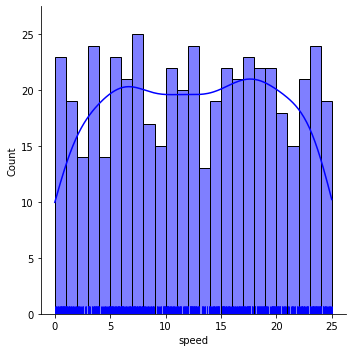

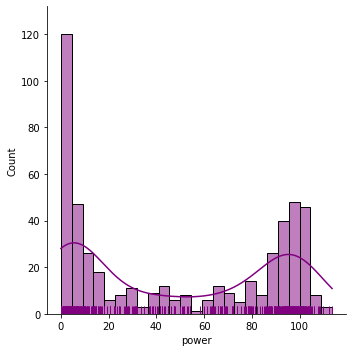

In [16]:
%matplotlib inline
# set up the subplots and figure sizes
#f, axes = plt.subplots(1, 2, figsize=(12, 4))

# plot the histograms of Speed values
sns.displot(df['speed'], kde=True, rug=True, color="blue", bins=25)
# add a vertical line at the mean
#axes[0].axvline(df['speed'].mean(), color='yellow', linewidth=2, linestyle="--")
# add a vertical line at the median
#axes[0].axvline(df['speed'].quantile(q=0.5), color='cyan', linewidth=2, linestyle=":")
# add a title
#axes[0].set_title("Histogram of Speed values")


#plot the histogram of Power values
sns.displot(df['power'], kde=True, rug=True, color="purple", bins=25)
# add a vertical line to show the mean
#axes[1].axvline(df['power'].mean(), color='yellow', linewidth=2, linestyle="--")
# add a vertical line to show the median
#axes[1].axvline(df['power'].quantile(q=0.5), color='cyan', linewidth=2, linestyle=":")
# add title
#axes[1].set_title("Histogram of  Power values");
plt.show()

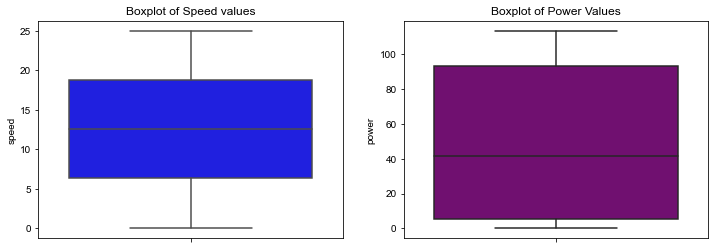

In [17]:
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.set(style="ticks", palette="pastel")
sns.boxplot(y=df['speed'], ax=axes[0], color="blue")
# add a title
axes[0].set_title("Boxplot of Speed values")
sns.boxplot(y=df['power'], ax=axes[1], color="purple")
axes[1].set_title("Boxplot of Power Values");

## Regression to investigate a relationship between Speed and Power

Plots such as scatter plots can help to identify trends and patterns in a dataset which might indicate a relationship.

The scatter plot below visualise relationships between two numerical variables such as speed and power values. The correlation statistics below will then be used to put a numerical value on the strength and direction of the relationship. 
A scatter plot is a plot of the ordered pairs of numbers consisting of the independent variable x  and the dependent variable y. It shows the joint distribution of two variables where each point represents an observation in the dataset and can be used to spot relationships that may exist. 
Here scatter plots are drawn using the seaborn `scatterplot` function where the speed is shown along the vertical axis and the power values along the vertical axis. Each point is an actual observation is the dataset with a speed and a corresponding power value.

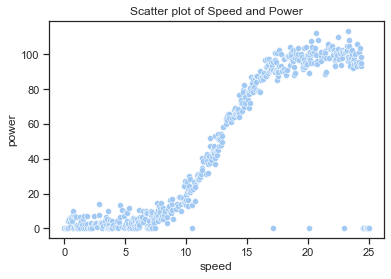

In [18]:
# create the plot
sns.scatterplot(x=df['speed'],y=df['power'])
# add title
plt.title("Scatter plot of Speed and Power");

### Correlation and Covariance of Speed and Power values
For two quantitative variables such as the speed and power values, the covariance and correlation are statistics of interest which are used to determine whether a linear relationship between variables exists and shows if one variable tends to occur with large or small values of another variable.

[Covariance](https://en.wikipedia.org/wiki/Covariance) is a measure of the joint variability of two random variables and the (Pearson) [correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) is the normalised version of the covariance which shows by its magnitude the strength of the linear relation.

The covariance shows how much two variables vary with each other and in what direction one variable will change when another one does. If a covariance is positive then when one measurement is above it's mean then the other measurement will more than likely be above it's mean and vice versa while with  a negative covariance when one variable is above the mean the other measurement is likely to be below it's mean. A zero covariance implies that the two variables vary independently of each other. 

The correlation statistics are computed from pairs of arguments. The correlation of the measurements can be got using the pandas `corr` method on the dataframe. If there is a strong positive relationship between the variables, the value of the correlation coefficient will be close to 1, while a strong negative relationship will have a correlation coefficient close to -1. A value close to zero would indicate that there is no relationship between the variables.

The correlation is easier to interpret than the covariance. 
Correlation does not depend on units of measurement and does not depend on which variable is x or y. $r$ is the symbol used for sample correlation and $\rho$ is the symbol for the population correlation.

In [20]:
df.cov()

,speed,power
speed,52.200499,256.700945
power,256.700945,1731.772627


In [21]:
df.corr()

,speed,power
speed,1.000000,0.853778
power,0.853778,1.000000


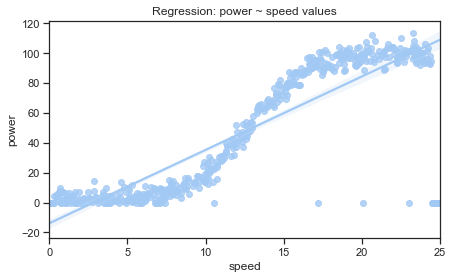

In [22]:
plt.figure(figsize=(7, 4))
sns.regplot(x="speed", y="power", data=df)
plt.title("Regression: power ~ speed values");

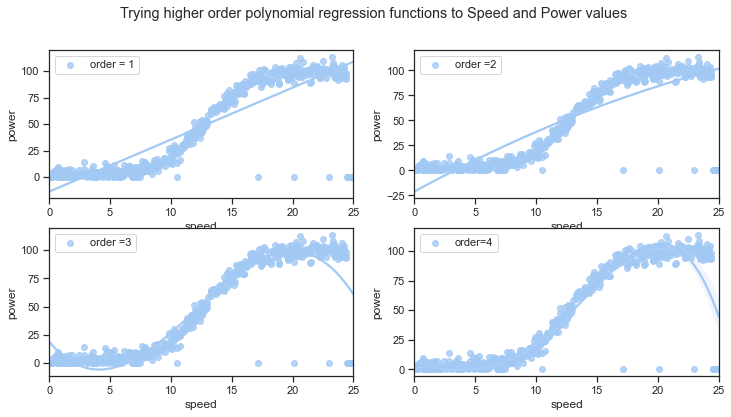

In [24]:
f, axes = plt.subplots(2, 2, figsize=(12, 6))
x = "speed"
y = "power"
sns.regplot(x="speed", y="power", data=df, ax=axes[0,0], label="order = 1", ci=False); axes[0,0].legend()
sns.regplot(x="speed", y="power", data=df, order=2, ax=axes[0,1], label="order =2", ci=False); axes[0,1].legend()
sns.regplot(x="speed", y="power", data=df, order=3, ax=axes[1,0], label="order =3", ci=False); axes[1,0].legend()
sns.regplot(x="speed", y="power", data=df, order=4, ax=axes[1,1], label = "order=4"); axes[1,1].legend()
plt.legend()
plt.suptitle("Trying higher order polynomial regression functions to Speed and Power values")
plt.show()

#### Regression of Speed and Power using higher order polynomials
The plots above show the difference between linear regression and higher order polynomials.
The polynomial with order 3 looks a much better fit to the line than the first or second order linear regression lines. 

#### Using a lowess smoother to fit a regression of total bill and tip
The seaborn tutorial shows another way of fitting a nonparametric regression using a lowess smooth.
[lowess smoothing](https://www.statisticshowto.datasciencecentral.com/lowess-smoothing/) is used to fit a line to a scatter plot where 
noisy data values, sparse data points or weak interrelationships interfere with your ability to see a line of best fit. It also used for linear regression where least squares fitting doesn’t create a line of good fit or is too labor-intensive to use.
Lowess are non-parametric strategies for fitting a smooth curve to data points. A parametric fitting assumes the data fits some distribution which can misrepresent the data whereas non-parametric smoothers try to fund a curve of best fit without assuming the data must fit some distribution shape.

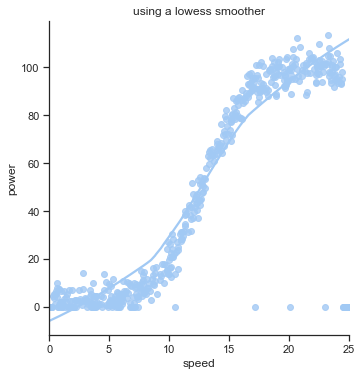

In [26]:
sns.lmplot(x="speed", y="power", data=df, lowess=True)
plt.title("using a lowess smoother")
plt.show()

Using Residual plots to check whether the simple regression model of speed ~ power  is appropriate.
Seaborns residplot() function is used for checking whether the simple regression model is appropriate for a dataset. A residplot fits and removes a simple linear regression and then plots the residual values for each observation. Ideally, these values should be randomly scattered around y = 0 as explained earlier. If there is structure in the residuals, this suggests that simple linear regression is not appropriate.
If the residual plot does have a shape this suggest non-linearity in the data set. A funnel shape pattern suggests that the data is suffering from heteroskedasticity, i.e. the error terms have non-constant variance. 
The residual plot below does suggest non-linearity in the data set.

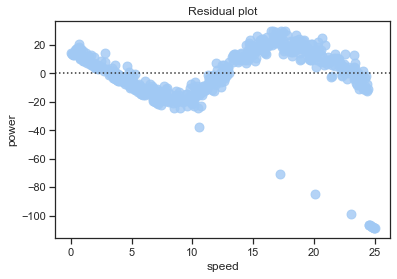

In [27]:
sns.residplot(x="speed", y="power", data=df, scatter_kws={"s": 80})
plt.title("Residual plot"); plt.show()